In [295]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [296]:
# Carregar os dados
df = pd.read_csv("dados\\jogadores_fifa_2024_limpo.csv")

In [297]:
# Jogador e Posição referência
id_jogador_ref = 238794
posicao_ref = "Extremo"

In [298]:
ratings_goleiro = ['skill_long_passing', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                   'power_shot_power', 'power_jumping', 'power_strength', 'mentality_vision', 'mentality_composure',
                   'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes',
                   'goalkeeping_speed']




ratings_zagueiro = ['pace', 'passing', 'dribbling', 'defending', 'physic', 'attacking_heading_accuracy', 'attacking_short_passing', 'skill_long_passing',
                   'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_reactions', 'power_jumping', 'power_stamina',
                   'power_strength', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_composure',
                   'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'attacking_work_rate', 'defending_work_rate']




ratings_lateral = ['pace', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_short_passing', 'skill_curve', 
                   'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                   'power_stamina', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                   'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                   'attacking_work_rate', 'defending_work_rate']




ratings_volante = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_heading_accuracy', 'attacking_short_passing',
                   'skill_dribbling', 'skill_long_passing', 'movement_acceleration', 'movement_agility', 'movement_reactions', 'movement_balance',
                   'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
                   'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_composure', 'defending_marking_awareness',
                   'defending_standing_tackle', 'defending_sliding_tackle', 'attacking_work_rate', 'defending_work_rate']




ratings_ala = ['pace', 'shooting', 'passing',  'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'skill_dribbling',
            'skill_curve', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
            'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
            'mentality_positioning', 'mentality_vision', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
            'attacking_work_rate', 'defending_work_rate']




ratings_meiocampo = ['pace', 'shooting', 'passing', 'dribbling', 'physic', 'attacking_finishing', 'attacking_short_passing', 'skill_dribbling', 'skill_curve',
                     'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_agility', 'movement_reactions',
                     'movement_balance', 'power_shot_power', 'power_stamina', 'power_strength', 'power_long_shots', 
                     'mentality_positioning', 'mentality_vision', 'mentality_composure', 'attacking_work_rate', 'defending_work_rate']




ratings_extremo = ['pace', 'shooting', 'passing', 'dribbling', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'attacking_volleys',
                   'skill_dribbling', 'skill_curve', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                   'movement_balance', 'power_shot_power', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_positioning', 'mentality_vision', 
                   'mentality_composure', 'attacking_work_rate', 'defending_work_rate']




ratings_atacante = ['pace', 'shooting', 'passing', 'dribbling', 'physic', 'attacking_finishing', 'attacking_heading_accuracy',
                'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_ball_control', 'movement_acceleration',
                'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
                'power_stamina', 'power_strength', 'power_long_shots', 'mentality_positioning', 'mentality_vision', 
                'mentality_composure', 'attacking_work_rate', 'defending_work_rate']


In [299]:
dict_filtragem = {
    "Goleiro": ratings_goleiro,
    "Zagueiro": ratings_zagueiro,
    "Lateral": ratings_lateral,
    "volante": ratings_volante,
    "Meio campo": ratings_meiocampo,
    "Ala": ratings_ala,
    "Extremo": ratings_extremo,
    "Atacante": ratings_atacante}

colunas_extras = ['player_id', 'short_name', 'long_name', 'player_positions', 'overall']



In [300]:
colunas_df = colunas_extras + dict_filtragem[posicao_ref]
df_filtrado = df[df['player_positions'].str.contains(posicao_ref, case=False)]
df_filtrado = df_filtrado[colunas_df].reset_index(drop=True)


In [301]:
# Selecionar as features para o cálculo da similaridade
features = df_filtrado.columns.difference(['player_id', 'short_name', 'long_name', 'player_positions', 'overall'])


In [302]:
# Normalizar os dados (opcional aqui, mas incluído para escalabilidade futura)
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_filtrado[features])
# dados_normalizados = np.array(df_filtrado[features]) - Caso não seja feita a normalização


In [303]:
dados_normalizados

array([[ 1.85400301,  3.68667823,  2.65822944, ...,  3.14358386,
         1.77336041,  3.02363779],
       [ 1.85400301,  3.09673062,  1.96156316, ...,  2.88684768,
         1.51596264,  2.89745903],
       [ 2.37125135,  2.38879348,  2.5421184 , ...,  3.40032003,
         2.45975448,  3.2759953 ],
       ...,
       [-1.4563864 , -3.15671412, -1.98621243, ..., -2.37624389,
        -1.40121212, -2.65440631],
       [-2.49088309, -3.98264078, -1.63787929, ..., -3.01808433,
        -2.00180693, -3.53765762],
       [-3.11158111, -1.85882936, -2.79898976, ..., -3.53155668,
        -1.83020841, -3.53765762]])

In [304]:
# Instanciar e treinar o modelo KNN com similaridade de cosseno
knn = NearestNeighbors(n_neighbors=len(df_filtrado), metric='cosine', algorithm='brute')  # n_neighbors = total de jogadores
knn.fit(dados_normalizados)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=1790)

In [305]:
# Obter o índice do jogador de referência
idx_ref = df_filtrado[df_filtrado['player_id'] == id_jogador_ref].index[0]

# Obter os índices e distâncias para todos os jogadores
distancias, indices = knn.kneighbors([dados_normalizados[idx_ref]])

# Criar um DataFrame com os resultados
resultados = pd.DataFrame({
    'Player_ID': df_filtrado.iloc[indices[0]]['player_id'].values,
    'Nome': df_filtrado.iloc[indices[0]]['short_name'].values,
    'Nome completo': df_filtrado.iloc[indices[0]]['long_name'].values,
    'Posição': df_filtrado.iloc[indices[0]]['player_positions'].values,
    'Overall': df_filtrado.iloc[indices[0]]['overall'].values,
    'Similaridade': 1 - distancias[0]  # Similaridade = 1 - distância de cosseno
})

# Excluir o jogador de referência e ordenar pelos valores de similaridade em ordem decrescente
resultados = resultados[resultados['Player_ID'] != id_jogador_ref].sort_values(by='Similaridade', ascending=False)


# Selecionar os 100 jogadores mais similares
top_100 = resultados.head(100)

# Printar os resultados
top_100



,Player_ID,Nome,Nome completo,Posição,Overall,Similaridade
1,251566,Gabriel Martinelli,Gabriel Teodoro Martinelli Silva,"Extremo, Meio campo",84,0.984683
2,233419,Raphinha,Raphael Dias Belloli,Extremo,84,0.978583
3,245367,X. Simons,Xavi Quentin Shay Simons,"Extremo, Meio campo",79,0.963732
4,201995,Felipe Anderson,Felipe Anderson Pereira Gomes,"Atacante, Extremo",81,0.963579
5,241084,L. Díaz,Luis Fernando Díaz Marulanda,"Extremo, Meio campo",84,0.962244
...,...,...,...,...,...,...
96,225783,S. Mavididi,Stephy Alvaro Mavididi,"Atacante, Extremo",76,0.862412
97,234742,H. Barnes,Harvey Lewis Barnes,"Extremo, Meio campo",80,0.861750
98,235794,E. Eze,Eberechi Eze,"Extremo, Meio campo",79,0.861668
99,221445,Wu Lei,武磊,"Atacante, Extremo",72,0.858861


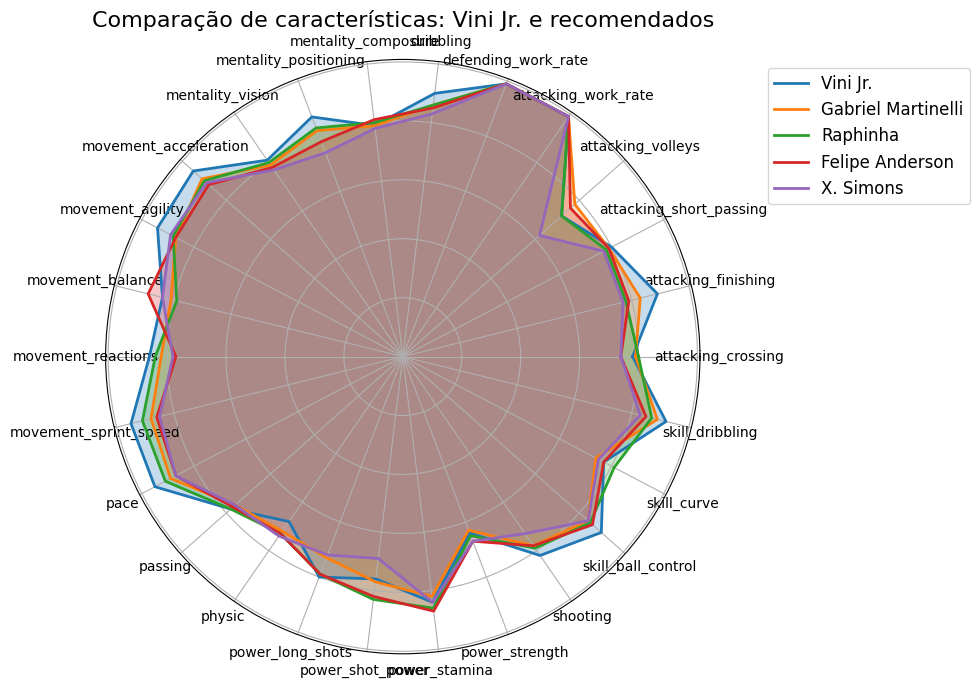

In [306]:
jogador_ref = df_filtrado[df_filtrado['player_id'] == id_jogador_ref]['short_name'].values[0]


# Selecionar os 4 jogadores mais similares
top_4 = resultados.head(4)

# Adicionar o jogador de referência ao DataFrame para o gráfico
jogadores_para_grafico = pd.concat([df_filtrado[df_filtrado['player_id'] == id_jogador_ref], df_filtrado[df_filtrado['player_id'].isin(top_4['Player_ID'])]])

# Gráfico de radar
num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo (adicionando o primeiro valor de volta ao final)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plotar cada jogador no gráfico de radar
for _, jogador in jogadores_para_grafico.iterrows():
    valores = jogador[features].values.tolist()
    valores += valores[:1]  # Fechar o círculo
    ax.plot(angles, valores, linewidth=2, label=jogador['short_name'])
    ax.fill(angles, valores, alpha=0.25)

# Ajustes do gráfico
ax.set_xticks(angles[:-1])  # Evitar a última repetição do ângulo
ax.set_xticklabels(features, fontsize=10, rotation=45)  # Ajustar a fonte
ax.set_yticklabels([])  # Remover os rótulos do eixo Y

# Legenda e título
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=12)
plt.title(f'Comparação de características: {jogador_ref} e recomendados', fontsize=16)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [307]:
# Se quiser salvar como CSV (opcional)
nome_arquivo_recomendacoes = f"recomendacoes\\top100_recomendacoes_{jogador_ref}_{id_jogador_ref}.csv"
top_100.to_csv(nome_arquivo_recomendacoes, index=False)

In [308]:
top_4

,Player_ID,Nome,Nome completo,Posição,Overall,Similaridade
1,251566,Gabriel Martinelli,Gabriel Teodoro Martinelli Silva,"Extremo, Meio campo",84,0.984683
2,233419,Raphinha,Raphael Dias Belloli,Extremo,84,0.978583
3,245367,X. Simons,Xavi Quentin Shay Simons,"Extremo, Meio campo",79,0.963732
4,201995,Felipe Anderson,Felipe Anderson Pereira Gomes,"Atacante, Extremo",81,0.963579


In [309]:
jogador_ref

'Vini Jr.'